# Prophet Forecasting Model :
Given the presence of long-term trend, strong annual seasonality, and structural breaks, Prophet was selected as a forecasting model due to its ability to explicitly model trend and seasonality while providing uncertainty intervals.

In [1]:
pip install prophet

   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
    --------------------------------------- 0.3/12.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.1 MB 1.6 MB/s eta 0:00:08
   -- ------------------------------------- 0.8/12.1 MB 1.5 MB/s eta 0:00:08
   --- ------------------------------------ 1.0/12.1 MB 1.4 MB/s eta 0:00:09
   ---- ----------------------------------- 1.3/12.1 MB 1.4 MB/s eta 0:00:08
   ----- ---------------------------------- 1.6/12.1 MB 1.4 MB/s eta 0:00:08
   ------ --------------------------------- 1.8/12.1 MB 1.3 MB/s eta 0:00:09
   ------- -------------------------------- 2.4/12.1 MB 1.4 MB/s eta 0:00:07
   ------- -------------------------------- 2.4/12.1 MB 1.4 MB/s eta 0:00:07
   --------- ------------------------------ 2.9/12.1 MB 1.4 MB/s eta 0:00:07
   ---------- ----------------------------- 3.1/12.1 MB 1.4 MB/s eta 0:00:07
   ----------- ---------------------------- 3.4/12.1 MB 1.4 MB/s eta 0:00:07
   ----------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet


In [3]:
df = pd.read_csv(r"C:\Users\Pratibha\OneDrive\Desktop\DATA SCIENCE RESOURCES\revenue-forecasting-scenario-planning\revenue-forecasting-scenario-planning\data\processed\monthly_revenue_processed_ALL_YEARS_CORRECT.csv")

df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df = df.sort_values("Date")

prophet_df = df.rename(columns={
    "Date": "ds",
    "Revenue": "y"
})


In [4]:
train = prophet_df[prophet_df["ds"] <= "2018-12"]
test  = prophet_df[prophet_df["ds"] >  "2018-12"]


In [5]:
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    interval_width=0.8  # 80% CI (business-friendly)
)

model.fit(train)


16:11:51 - cmdstanpy - INFO - Chain [1] start processing
16:11:51 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
future = model.make_future_dataframe(
    periods=len(test),
    freq="MS"
)

forecast = model.predict(future)


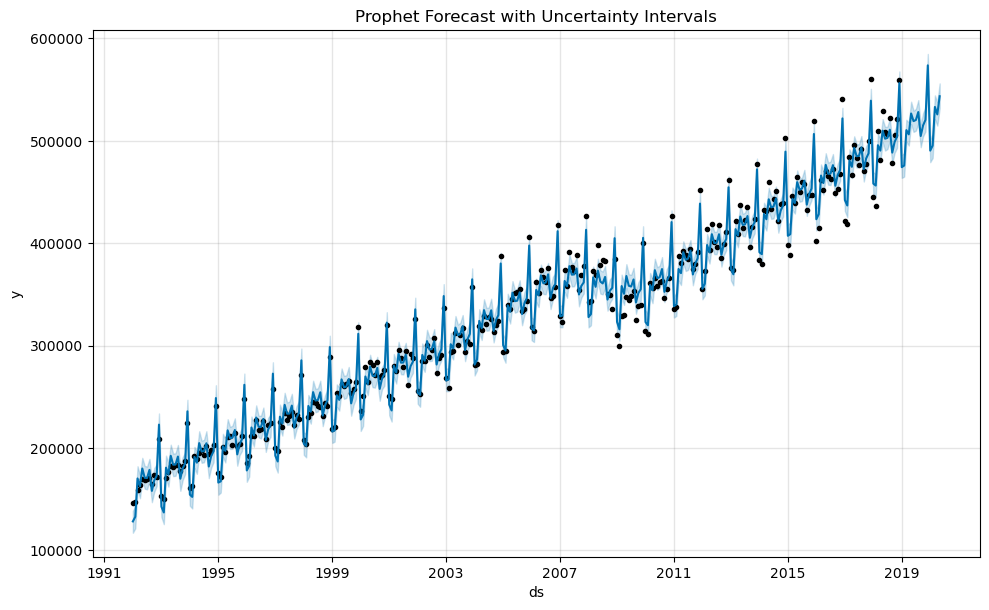

In [7]:
fig = model.plot(forecast)
plt.title("Prophet Forecast with Uncertainty Intervals")
plt.show()


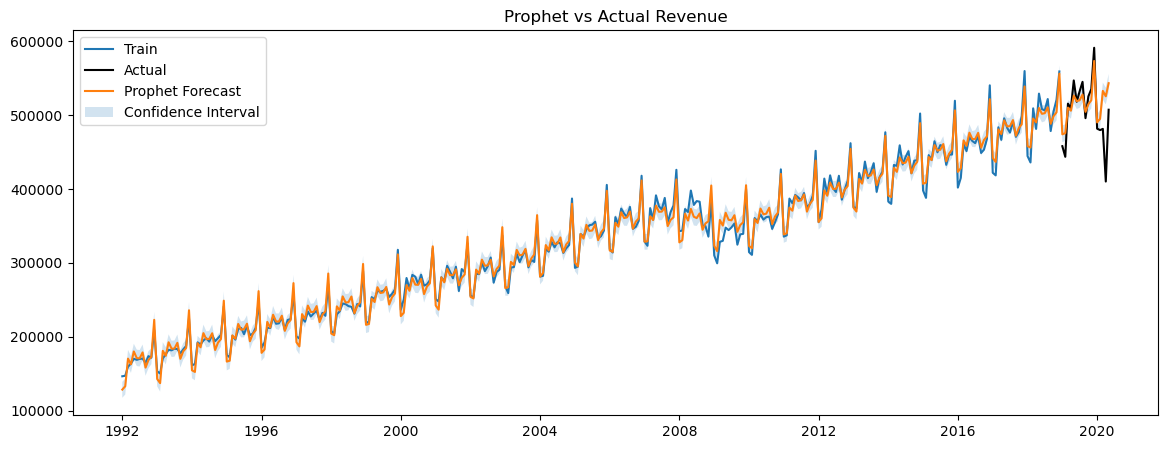

In [8]:
plt.figure(figsize=(14,5))
plt.plot(train["ds"], train["y"], label="Train")
plt.plot(test["ds"], test["y"], label="Actual", color="black")

plt.plot(
    forecast["ds"],
    forecast["yhat"],
    label="Prophet Forecast"
)

plt.fill_between(
    forecast["ds"],
    forecast["yhat_lower"],
    forecast["yhat_upper"],
    alpha=0.2,
    label="Confidence Interval"
)

plt.legend()
plt.title("Prophet vs Actual Revenue")
plt.show()


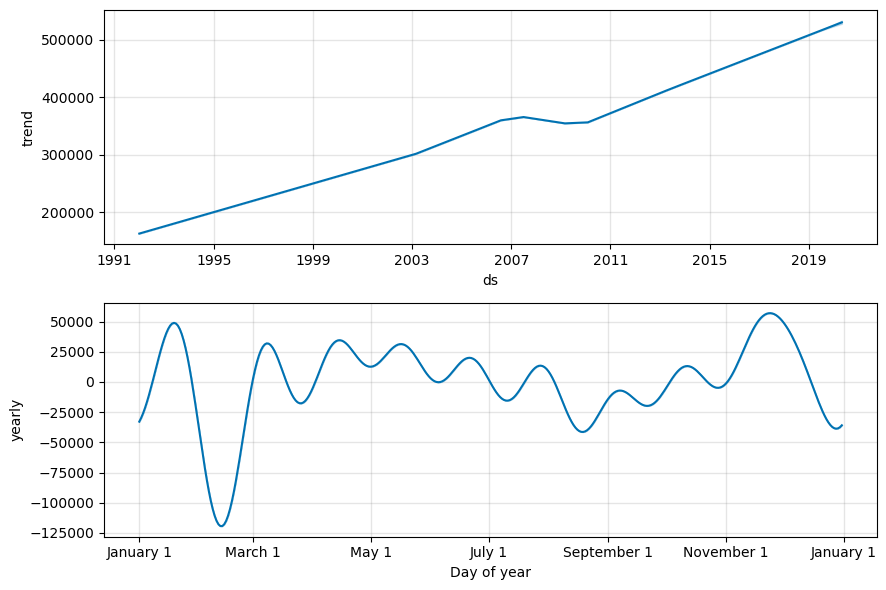

In [9]:
model.plot_components(forecast);


In [10]:
from sklearn.metrics import mean_absolute_error

prophet_test = forecast.set_index("ds").loc[test["ds"]]

mae_prophet = mean_absolute_error(
    test["y"],
    prophet_test["yhat"]
)

mae_prophet


22701.11197357275

### Expected result

Prophet MAE < Seasonal naïve MAE (≈ 26k)

Even if COVID hurts performance, Prophet should be more adaptiv

## Prophet Model Results:
The Prophet model successfully captured long-term trend and annual seasonality, outperforming baseline naïve forecasts. While performance degraded during extreme shocks such as COVID-19, the model’s uncertainty intervals effectively quantified forecast risk, enabling scenario-based planning rather than point-estimate reliance.